In [ ]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CW308_SAM4S'
REDUCTION = 'MONTGOMERY'
PROJ_DIR = '../victim/simpleserial-kyber'
FIRMWAREPATH = '/home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware'
NSHARES = 1

In [38]:
%%bash -s "$PROJ_DIR" "$FIRMWAREPATH" "$PLATFORM" "$REDUCTION" "$NSHARES"
cd $1
make FIRMWAREPATH=$2 PLATFORM=$3 REDUCTION=$4 NSHARES=$5

MONTGOMERY REDUCTION
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
MONTGOMERY REDUCTION
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
MONTGOMERY REDUCTION
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:12.2.rel1-1) 12.2.1 20221205
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     simpleserial-kyber.c ...
-e Done!
.
Compiling:
-en     src/cbd.c ...
-e Done!
.
Compiling:
-en     src/indcpa.c ...
-e Done!
.
Compiling:
-en     src/masked_indcpa.c ...
-e Done!
.
Compiling:
-en     src/masked_utils.c ...
-e Done!
.
Compiling:
-en     src/montgomery/ntt.c ...
-e Done!
.
Compiling:
-en     src/poly.c ...
-e Done!
.
Compiling:
-en     src/symmetric-fips202.c ...
-e Done!
.
Compiling:
-en     src/common/r

src/common/randombytes.c:38:2: warning: #warning Using a non-random randombytes [-Wcpp]
   38 | #warning Using a non-random randombytes
      |  ^~~~~~~


-e Done!
.
Compiling:
-en     src/common/fips202.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/startup_sam4s.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/sam4s_hal.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/uart.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/pio.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/system_sam4s.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardware/victims/firmware/hal/sam4s/sysclk.c ...
-e Done!
.
Compiling:
-en     /home/toluntosun/Desktop/CW/chipwhisperer/hardwa

In [3]:
import chipwhisperer as cw
try:
    if not scope.connectStatus:
        scope.con()
except NameError:
    scope = cw.scope()

try:
    target = cw.target(scope)
except IOError:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope)

scope.default_setup()

scope.adc.samples = 10000*NSHARES

print("INFO: Found ChipWhisperer😍")

scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 22                       
scope.gain.db                            changed from 15.0                      to 25.091743119266056       
scope.adc.samples                        changed from 131124                    to 5000                     
scope.clock.clkgen_freq                  changed from 0                         to 7370129.87012987         
scope.clock.adc_freq                     changed from 0                         to 29480519.48051948        
scope.clock.extclk_monitor_enabled       changed from True                      to False                    
scope.clock.extclk_tolerance             changed from 1144409.1796875           to 13096723.705530167       
scope.io.tio1                            changed from serial_tx                 to serial_rx                
scope.io.tio2      

In [39]:
fw_path = f'{PROJ_DIR}/simpleserial-kyber-{PLATFORM}.hex'
prog = cw.programmers.SAM4SProgrammer
cw.program_target(scope, prog, fw_path)

In [40]:
import kyber
import numpy as np

def coins_gen_s(coins):
    target.simpleserial_write('k',coins)
    sk_ = []
    
    for i in range(3):
        sk_.append(target.read(258))
    print(sk_)
    sk_ = bytes.fromhex(sk_[0][1:257] + sk_[1][1:257] + sk_[2][1:257])
    return kyber.decode_sk(sk_)

In [41]:
from Crypto.Hash import SHAKE128

def coins_to_c(coins):
    
    shake = SHAKE128.new()
    
    shake.update(coins)
    return kyber.kyber768_poly_unpack_decompress_du(shake.read(320))


In [42]:
import os

coins = os.urandom(32)
print(coins)

s = coins_gen_s(coins)
print(kyber.ntt.ntt_inv(s, central_red=True))

b'_w!\x9a\xfb\xa8\xde&\x97\xe4\x08\xfeF\xf9a\xc3\xbfuQ$\xb7\x1cj@\xa1\xd3\xfd\xcc\x1ds\x1e\xae'
['r4D3CCE5890B2C578BC6591606AAB1BF0B21F80A21A3C34700CEC91750B2E87F49E1871BCCC3A7E40152DD9015F5035A81FF2664945B841B606BA81158614914978050327BA5781016C3719AE1801D8033500D5A83AF6C29E15BFCDA94C096A805841B0D1DAA2770983EF6741A06BBD136A753F5C64DB74B33AB7C9D9F66ADC83\n', 'r85CA3A42B3B5BDDDE98F7F305E2E04BB3BC5C95B0C8EF79184F7D8321A62C98DAB0E9654A1FE88356DF8AF72929023D26067A69F788C9C734353C2EA2574A4664DC209ED214D1F71178D184148C571D5D6895EABC009A6521A55245208C2CA45BCF5FAAFFA390D6C519ABE53C38FF2256FD22664E616881358EA0A69549336E7\n', 'rAA9F9A36736FE230E169280C540B495A70430C588DCA89F82A04C213BD27F177D44256C07C6DEFF4ADC9805FDD7287097122F40BC45DD9A67CD55282081944E044AE8C22D48A62522390952604F2A81ADCF51EC7205A58185B5285CDE5D3BFDCF8AB8B9C2C270128BC73C227181D120454F21A172EB0630E58A3E2E9CBA1DA42\n']
[ 0  1  0 -2 -1  0  1  1 -1  1  1 -1  0  0  2  0  1  0  0 -1  2  0 -1 -1
 -1  0 -1  0  0  0  0 -1  0 -2 -1  2  0 -

In [45]:
target.simpleserial_write('q', bytes())
target.simpleserial_wait_ack()

0

In [46]:
#Capture Traces
from tqdm.auto import tqdm
import estraces
import numpy as np
import time
import os

N = 1000

for i in range(1000):
    filename = f'traces/kyber_basemult_{REDUCTION.lower()}_d{NSHARES}_t{i}.ets'
    if os.path.isfile(filename):
        continue
    es_writer = estraces.ETSWriter(filename=filename, overwrite=False)
    break

target.output_len = 0


for i in tqdm(range(N)):
    coins = os.urandom(32)
    trace = cw.capture_trace(scope, target, cw.bytearray(coins))
    if trace is None:
        continue
    es_writer.write_samples(trace.wave)
    es_writer.write_metadata('c', coins_to_c(coins))
    es_writer.write_metadata('s', s)
    
es_writer.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

ERROR:estraces.formats.ets_writer:Exception raised during init of h5f file: [Errno 2] Unable to synchronously open file (unable to open file: name = 'traces/kyber_basemult_montgomery_d1_t0.ets', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0).


In [49]:
import estraces

ths = estraces.read_ths_from_ets_file(filename)

print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file traces/kyber_basemult_montgomery_d1_t0.ets with 1000 traces.
c................: uint16
s................: uint16



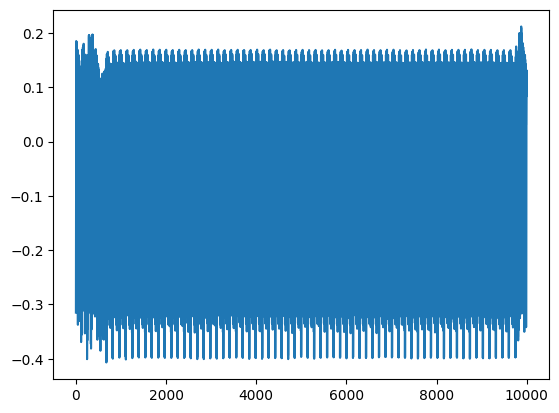

In [50]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

mean = ths.samples.mean(axis=0)

ax.plot(mean)